Example 1 (Cancer prediction based on tumor size)

In [6]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.78]).reshape(-1,1))
print(predicted)

[1]


array([[3.78],
       [2.44],
       [2.09],
       [0.14],
       [1.72],
       [1.65],
       [4.92],
       [4.37],
       [4.96],
       [4.52],
       [3.69],
       [5.88]])

Example 2: Iris Dataset

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
file_path = 'iris.csv'
data = pd.read_csv(file_path)
data.sample(10)


,sepal.length,sepal.width,petal.length,petal.width,variety
83,6.0,2.7,5.1,1.6,Versicolor
145,6.7,3.0,5.2,2.3,Virginica
61,5.9,3.0,4.2,1.5,Versicolor
94,5.6,2.7,4.2,1.3,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
106,4.9,2.5,4.5,1.7,Virginica
41,4.5,2.3,1.3,0.3,Setosa
134,6.1,2.6,5.6,1.4,Virginica
20,5.4,3.4,1.7,0.2,Setosa
109,7.2,3.6,6.1,2.5,Virginica


In [11]:
data['variety'].values

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [12]:
# Step 2: Data Preprocessing - Encode the target variable 'variety'
label_encoder = LabelEncoder()
data['variety'] = label_encoder.fit_transform(data['variety'])
data


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# Step 3: Define features (X) and target (y)
X = data.drop(columns=['variety'])  # Features: Sepal length, Sepal width, Petal length, Petal width
y = data['variety']                # Target: Encoded flower variety

In [14]:
# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [15]:
# Step 5: Apply Logistic Regression
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [17]:
# Step 6: Predict on the test set
y_pred = logistic_model.predict(X_test)
len(y_pred)

45

In [53]:
# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [54]:
# Step 8: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[15,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 14]], dtype=int64)

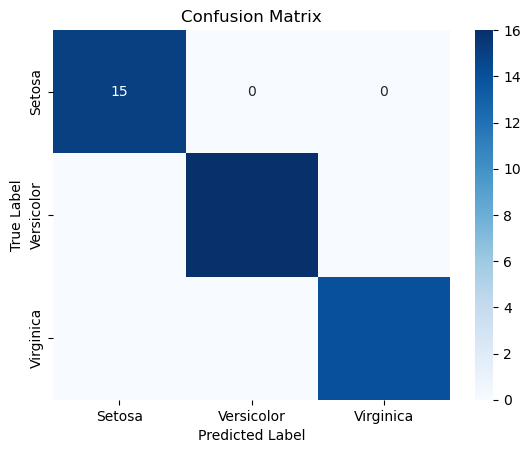

In [55]:
# Step 9: Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Print results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        16
   Virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [18]:
# Example input for a new Iris flower with feature values:
new_input = [[2.9, 3.0, 1.1, 4.8]]  # sepal.length, sepal.width, petal.length, petal.width

# Convert the input to a DataFrame with the same feature names
new_input_df = pd.DataFrame(new_input, columns=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])

# Use the trained logistic regression model to predict the class
predicted_class = logistic_model.predict(new_input_df)

# Convert the predicted numerical class back to the original flower name
predicted_flower = label_encoder.inverse_transform(predicted_class)

print(f"Predicted Flower: {predicted_flower[0]}")


Predicted Flower: Setosa


Example 3: Diabetes dataset

In [23]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

In [24]:
# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [25]:
# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [26]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=200,class_weight='balanced')
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# After training and before making predictions
print("Class distribution in target variable:")
print(y.value_counts())

# Making predictions on the test set
y_pred = model.predict(X_test)

# Check unique predictions
print("Unique predictions:", np.unique(y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Class distribution in target variable:
Outcome
0    500
1    268
Name: count, dtype: int64
Unique predictions: [0 1]
Confusion Matrix:
[[68 31]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.56      0.71      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154



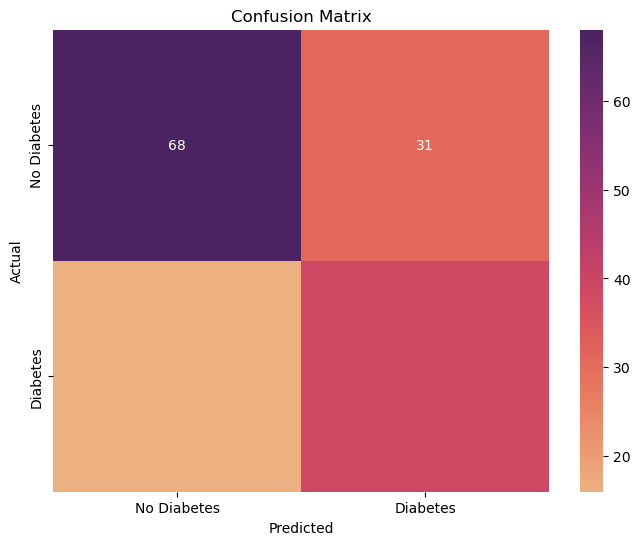

In [30]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])

# Add labels, title, and adjust for readability
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Testing with a new input
new_data = pd.DataFrame([[5, 116, 74, 0, 0, 25.6, 0.201, 30]], 
                         columns=X.columns)  # Use the same columns as X
prediction = model.predict(new_data)
print(f"Predicted Outcome for input {new_data.iloc[0].values}: {prediction[0]}")

Predicted Outcome for input [  5.    116.     74.      0.      0.     25.6     0.201  30.   ]: 0
